In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

#### Functions

In [3]:
font_size = 22

In [4]:
def _generate_azure_ai_metrics_visual(df, font_size, color):
    # To visualise various evaluation metrics related to an Azure AI Platform
    
    metrics = ['gpt_coherence', 'gpt_fluency', 'gpt_groundedness', 'gpt_relevance', 'gpt_similarity', 'f1_score']

    # Create subplots for visualising the metrics
    fig, axes = plt.subplots(2, 3, figsize=(30, 10))

    # Iterate over each subplot
    for ax, metric in zip(axes.flatten(), metrics): 

        # Filter only current metric
        data = df[metric]

        # if metric is F1, use histogram to plot the distribution
        if metric == 'f1_score':
            ax.hist(data, color=color, bins=20) 
            # Set the score limit to 1
            ax.set_xlim(0, 1)
        else:
            # other metrics contain discrete score from 1 to 5
            values = [1, 2, 3, 4, 5]

            # Count records for each score, then use bar chart to plot
            ax.bar(values, [np.sum(data == value) for value in values], width=0.5, color=color)

        # Set labels and limit for y-axis
        ax.set_xlabel('Score', fontsize=font_size)
        ax.set_ylabel('Frequency', fontsize=font_size)
        ax.set_ylim(0, 700)

        # Calculate and plot mean score as a vertical line on the visualisation
        average_score = np.mean(data)
        ax.axvline(average_score, color='red', linestyle='--', linewidth=3)
        if metric == 'f1_score':
            ax.set_title(f"F1 Score, Average Score: {average_score:.2f}", fontsize=font_size)
        else:
            ax.set_title(f"{metric.split('_')[-1].title()}, Average Score: {average_score:.2f}", fontsize=font_size)

        # Set font size for tick label
        ax.tick_params(labelsize=font_size)
    
    plt.tight_layout()
    plt.show()

In [5]:
def _generate_bleu_visual(df, fontsize, color, ylimit):
    # To visualise BLEU metric score distribution

    # Create subplots for visualising the metrics
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot the KDE of the data
    sns.kdeplot(df['bleu'], ax=ax, color=color, fill=True, bw_adjust=0.5)

    # Set labels
    ax.set_xlabel('Score', fontsize=fontsize)
    ax.set_ylabel('Density', fontsize=fontsize)

    # Set x and y axis limit for consistency
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, ylimit)

    # Calculate and plot mean score as a vertical line on the visualisation
    average_score = np.mean(df['bleu'])
    ax.axvline(average_score, color='red', linestyle='--', linewidth=2)

    # Set title
    ax.set_title(f"BLEU Score, Avg: {average_score:.2f}", fontsize=fontsize)

    # Set font size for tick label
    ax.tick_params(labelsize=fontsize)
    
    plt.tight_layout()
    plt.show()

In [6]:
def _generate_rouge_visual(df, fontsize, color, ylimit):
    # To visualise BLEU metric score distribution
    
    metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
               'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
               'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
               'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1']
    
    # Create subplots for visualising the metrics
    fig, axes = plt.subplots(4, 3, figsize=(20, 12))

    # Iterate over each subplot
    for ax, metric in zip(axes.flatten(), metrics):

        # Filter only current metric
        data = df[metric]

        ## Plot the KDE of the data
        sns.kdeplot(data, ax=ax, color=color, fill=True, bw_adjust=0.5)

        # Set labels
        ax.set_xlabel('Score', fontsize=fontsize)
        ax.set_ylabel('Density', fontsize=fontsize)

        # Set x and y axis limit for consistency
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(0, ylimit)
        
        # Calculate and plot mean score as a vertical line on the visualisation
        average_score = np.mean(data)
        ax.axvline(average_score, color='red', linestyle='--', linewidth=2)

        # Set title
        ax.set_title(f"{metric.replace('_', ' ').title()}, Avg: {average_score:.2f}", fontsize=fontsize)
        ax.tick_params(labelsize=fontsize)
    
    plt.tight_layout()
    plt.show()

In [7]:
def _learning_curve_visual(df, step_interval, epochlim, losslim, columns, fontsize, marker=None):
    # To visualise learning curve including loss and accuracy on both train and validation set
    
    # Filter the data include data point every step interval to enhance readability
    filtered_df = df[df['step'] % step_interval == 0]

    # Create subplots for visualising the metrics
    fig, axs = plt.subplots(2, 1, figsize=(20, 8))
    
    # Plot train loss vs validation loss
    axs[0].plot(filtered_df['step'], filtered_df[columns[0]], label='Train Loss', color='royalblue')
    axs[0].plot(filtered_df['step'], filtered_df[columns[1]], label='Validation Loss', color='red', marker=marker)

    # Set labels, legend, title, axis limit
    axs[0].set_xlabel('Step', fontsize=fontsize)
    axs[0].set_ylabel('Loss', fontsize=fontsize)
    axs[0].set_title('Train vs Validation Loss', fontsize=fontsize)
    axs[0].legend(fontsize=fontsize, loc='upper right')
    axs[0].grid(True)
    axs[0].set_xlim(0, epochlim)
    axs[0].set_ylim(0, losslim)
    axs[0].tick_params(axis='both', labelsize=fontsize)
    
    # Plot train accuracy vs validation accuracy
    axs[1].plot(filtered_df['step'], filtered_df[columns[2]], label='Train Accuracy', color='darkseagreen')
    axs[1].plot(filtered_df['step'], filtered_df[columns[3]], label='Validation Accuracy', color='orange', marker=marker)

    # Set labels, legend, title, axis limit
    axs[1].set_xlabel('Step', fontsize=fontsize)
    axs[1].set_ylabel('Accuracy', fontsize=fontsize)
    axs[1].set_title('Train Accuracy vs Validation Accuracy', fontsize=fontsize)
    axs[1].legend(fontsize=fontsize, loc='lower right')
    axs[1].grid(True)
    axs[1].set_xlim(0, epochlim)
    axs[1].set_ylim(0, 1)
    axs[1].tick_params(axis='both', labelsize=fontsize)
    
    plt.tight_layout()
    plt.show()

In [8]:
def _binned_train_score(df, columns, fontsize, losslim):
    # To visualise loss and accuracy of both training and validation set using bar chart

    # Bin train steps to 6 groups
    step_bins = np.linspace(0, df['step'].max(), 7)
    df['step_binned'] = pd.cut(df['step'], bins=step_bins)
    
    # Group and calculate the mean accuracy for each group
    binned_df = df.groupby('step_binned', observed=False).agg(
        {columns[0]: 'mean', columns[1]: 'mean', columns[2]: 'mean', columns[3]: 'mean'}).reset_index()
    
    # Create subplots for visualising the metrics
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot bat chart with train accuracy in the centred and validation accuracy overlapping
    ax1.bar(binned_df['step_binned'].astype(str), binned_df[columns[2]], 
            label='Train Accuracy', color='darkseagreen', alpha=0.7, width=0.4, align='center')
    ax1.bar(binned_df['step_binned'].astype(str), binned_df[columns[3]], 
            label='Validation Accuracy', color='orange', alpha=0.7, width=0.4, align='edge')
    
    # Plot train loss and validation loss trends using line chart
    ax2 = ax1.twinx()
    ax2.plot(binned_df['step_binned'].astype(str), binned_df[columns[0]], 
                           label='Train Loss Trend', color='royalblue', marker='o', linewidth=2)
    ax2.plot(binned_df['step_binned'].astype(str), binned_df[columns[1]], 
                           label='Validation Loss Trend', color='red', marker='^', linewidth=2)
    
    # Set labels and title
    ax1.set_xlabel('Step', fontsize=fontsize)
    ax1.set_ylabel('Average Accuracy', fontsize=fontsize)
    ax2.set_ylabel('Average Loss', fontsize=fontsize)
    
    # Set legends
    ax1.legend(loc='upper center', fontsize=fontsize, frameon=False, bbox_to_anchor=(0.5, 1.15), ncol=2)
    ax2.legend(loc='upper center', fontsize=fontsize, frameon=False, bbox_to_anchor=(0.5, 1.11), ncol=2)

    # Set tick based on the binned step
    bin_label = [f'{int(bin.right)}' for bin in binned_df['step_binned']]
    ax1.set_xticks(np.arange(len(bin_label)))
    ax1.set_xticklabels(bin_label, ha='right', fontsize=fontsize)
    
    # Set tick font size
    ax1.tick_params(axis='both', labelsize=fontsize)
    ax2.tick_params(axis='both', labelsize=fontsize)

    # Set x and y axis limit for consistency
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, losslim)

    # Set grid for the bar chart
    ax1.grid(True)
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

### Azure AI Pipeline's Score Visualization on SQuAD Dataset

In [9]:
base_df = pd.read_csv('../../data/training/result/squad/Azure-AI/metrics/evaluation_SQUAD Base Model_Output_Table_09-10-2024-16-10.csv')
tune_df = pd.read_csv('../../data/training/result/squad/Azure-AI/metrics/evaluation_SQUAD Tune Model_Output_Table_09-10-2024-16-10.csv')

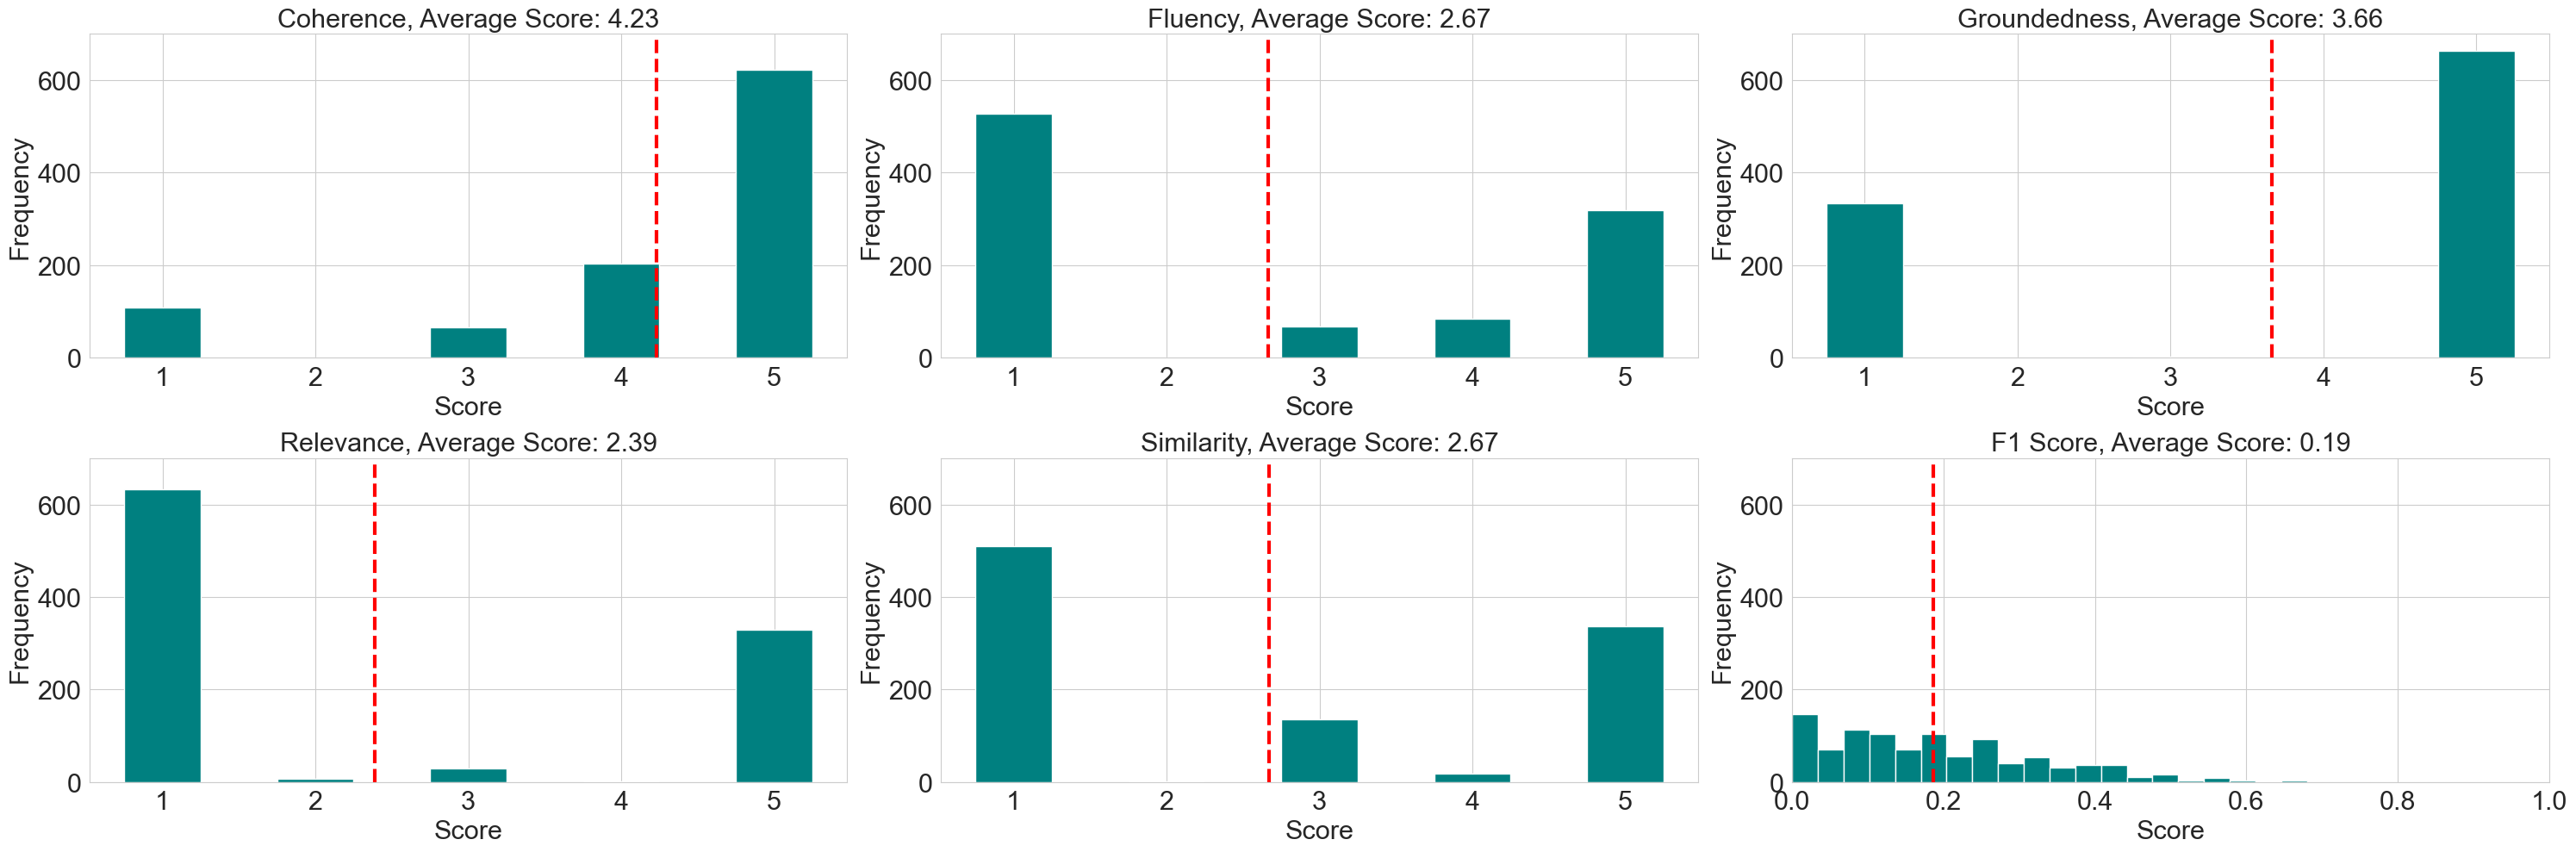

In [10]:
# Azure AI metrics on SQuAD dataset prior the fine-tuning process
_generate_azure_ai_metrics_visual(base_df, font_size, 'teal')

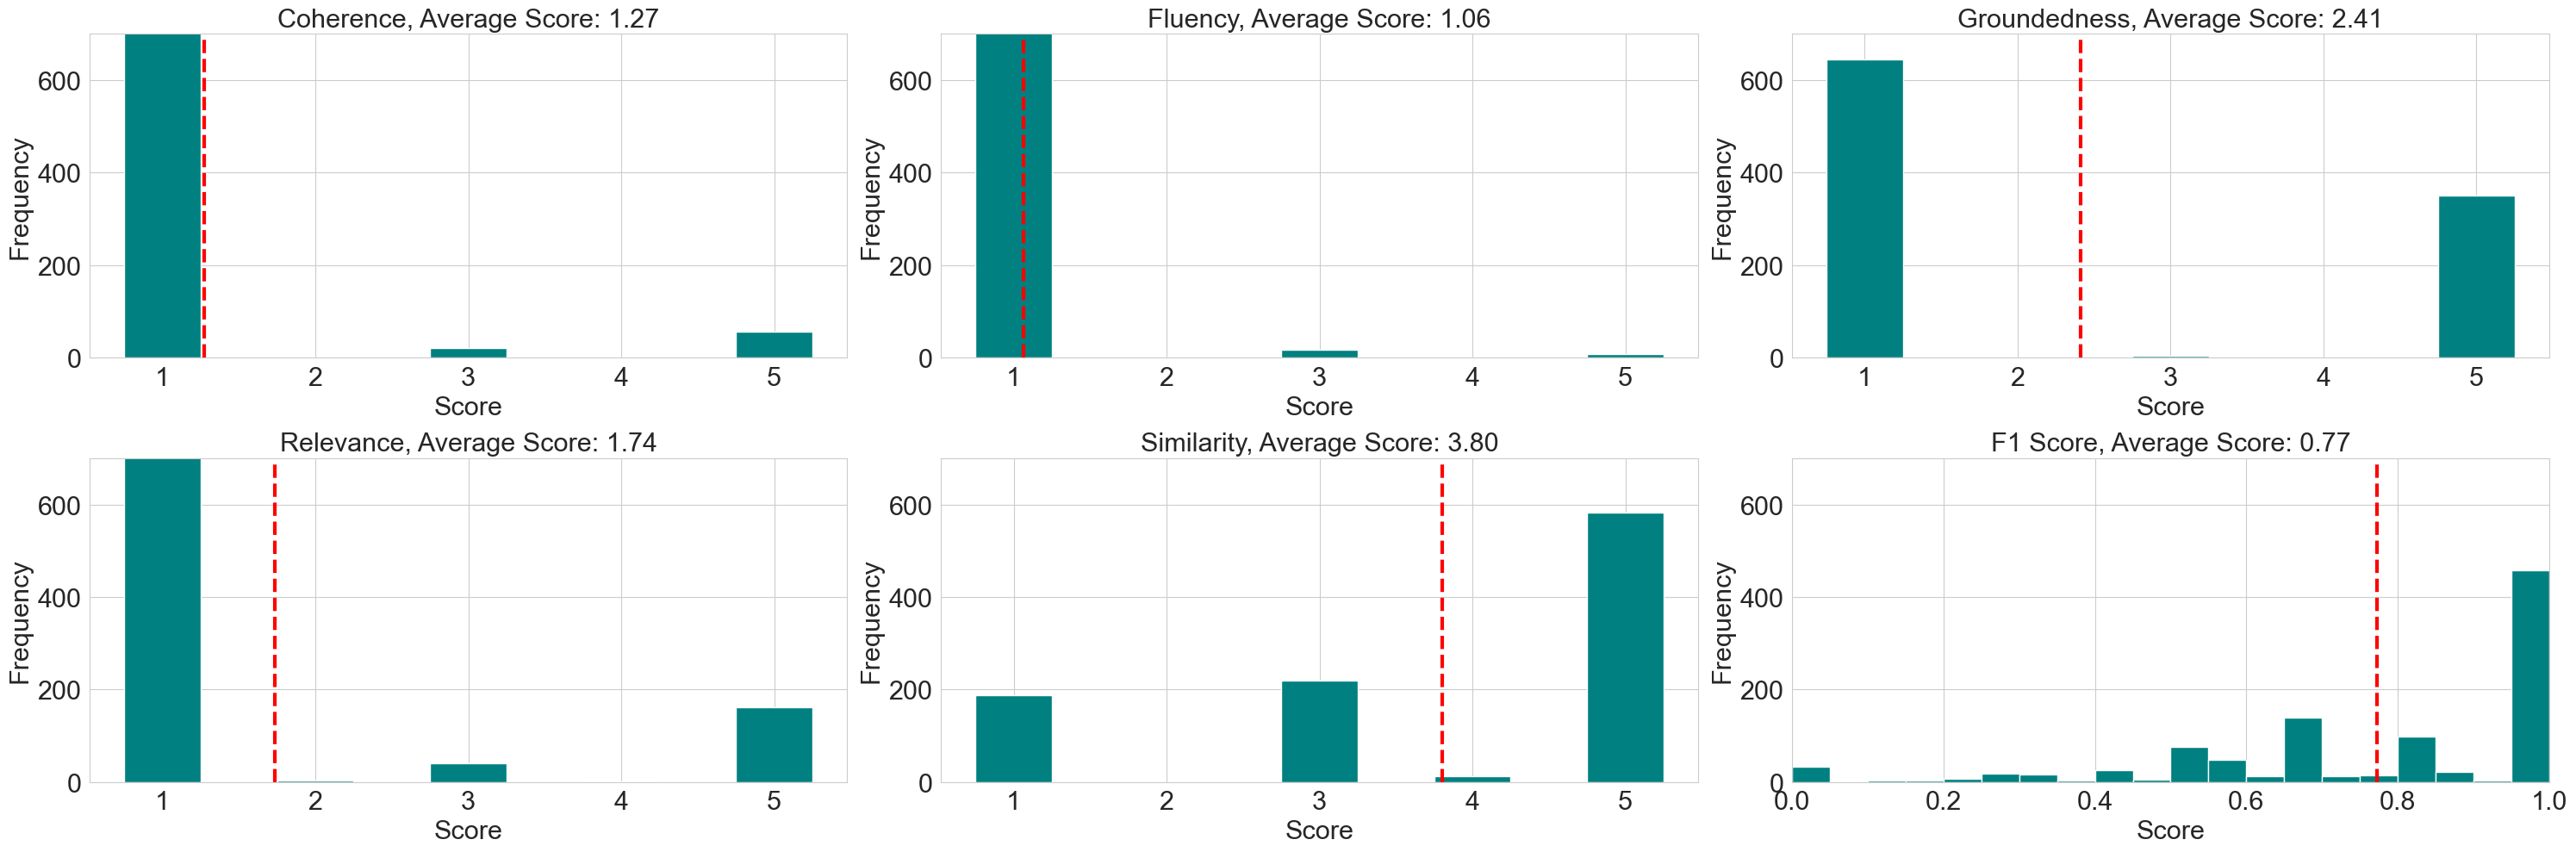

In [11]:
# Azure AI metrics on SQuAD dataset after the fine-tuning process
_generate_azure_ai_metrics_visual(tune_df, font_size, 'teal')

In [12]:
base_df = pd.read_csv('../../data/training/result/squad/Azure-AI/metrics/base_model.csv')
tune_df = pd.read_csv('../../data/training/result/squad/Azure-AI/metrics/tuned_model.csv')

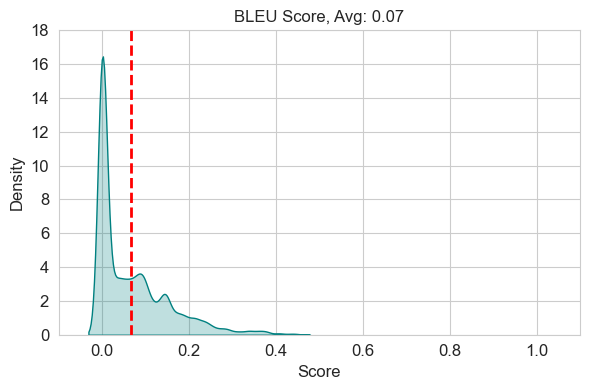

In [13]:
# BLEU score on SQuAD dataset with Azure pipeline prior the fine-tuning process
_generate_bleu_visual(base_df, 12, 'teal', 18)

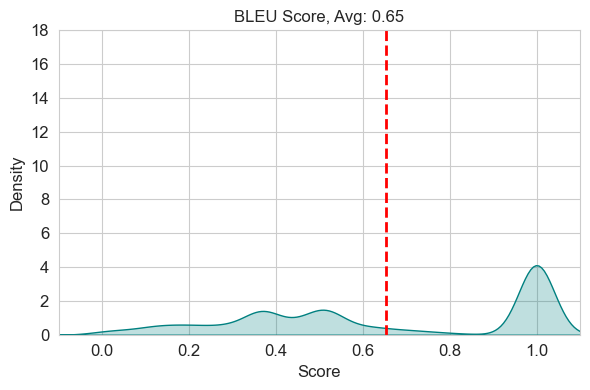

In [14]:
# BLEU score on SQuAD dataset with Azure pipeline after the fine-tuning process
_generate_bleu_visual(tune_df, 12, 'teal', 18)

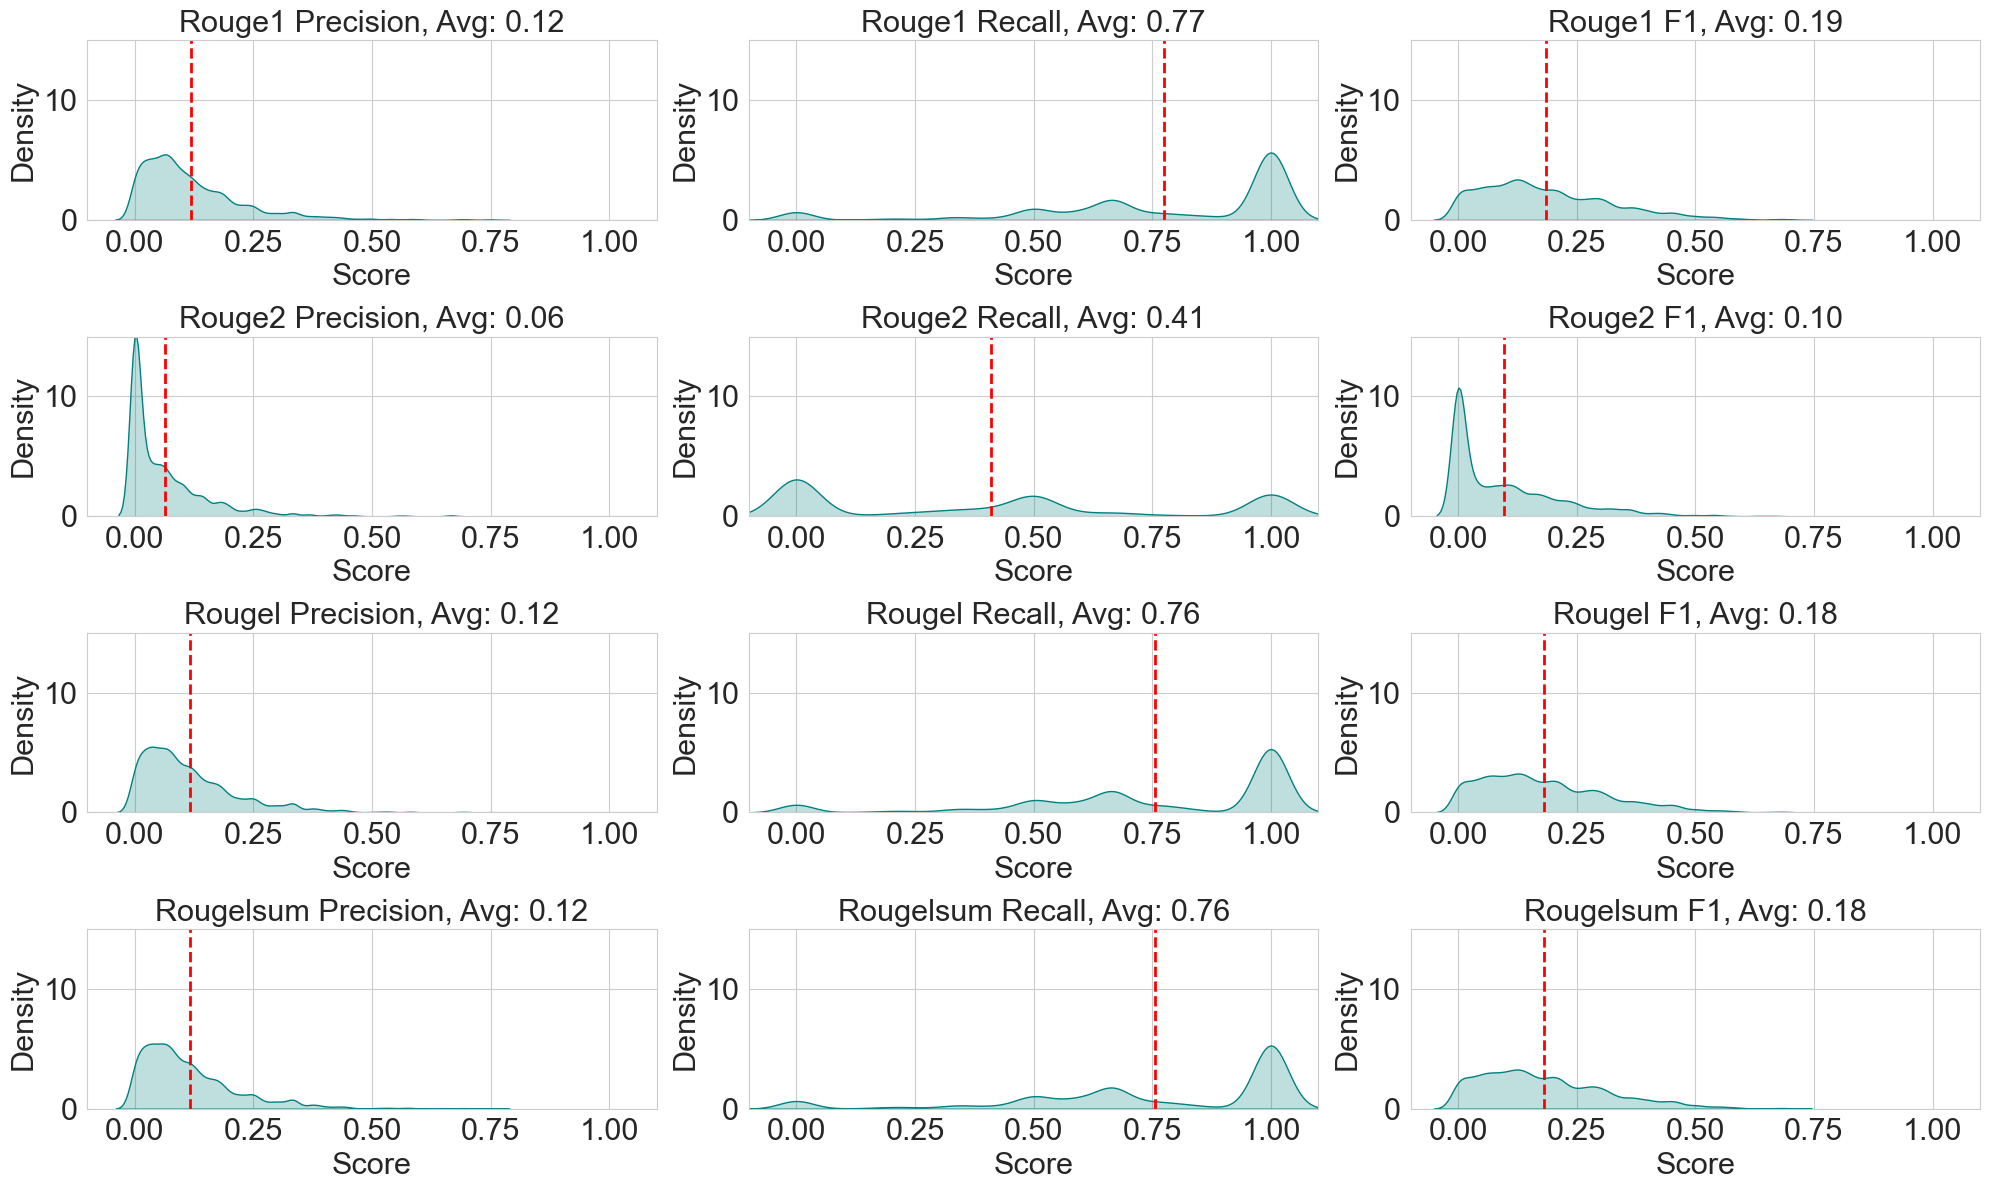

In [15]:
# ROUGE score on SQuAD dataset with Azure pipeline prior the fine-tuning process
_generate_rouge_visual(base_df, font_size, 'teal', 15)

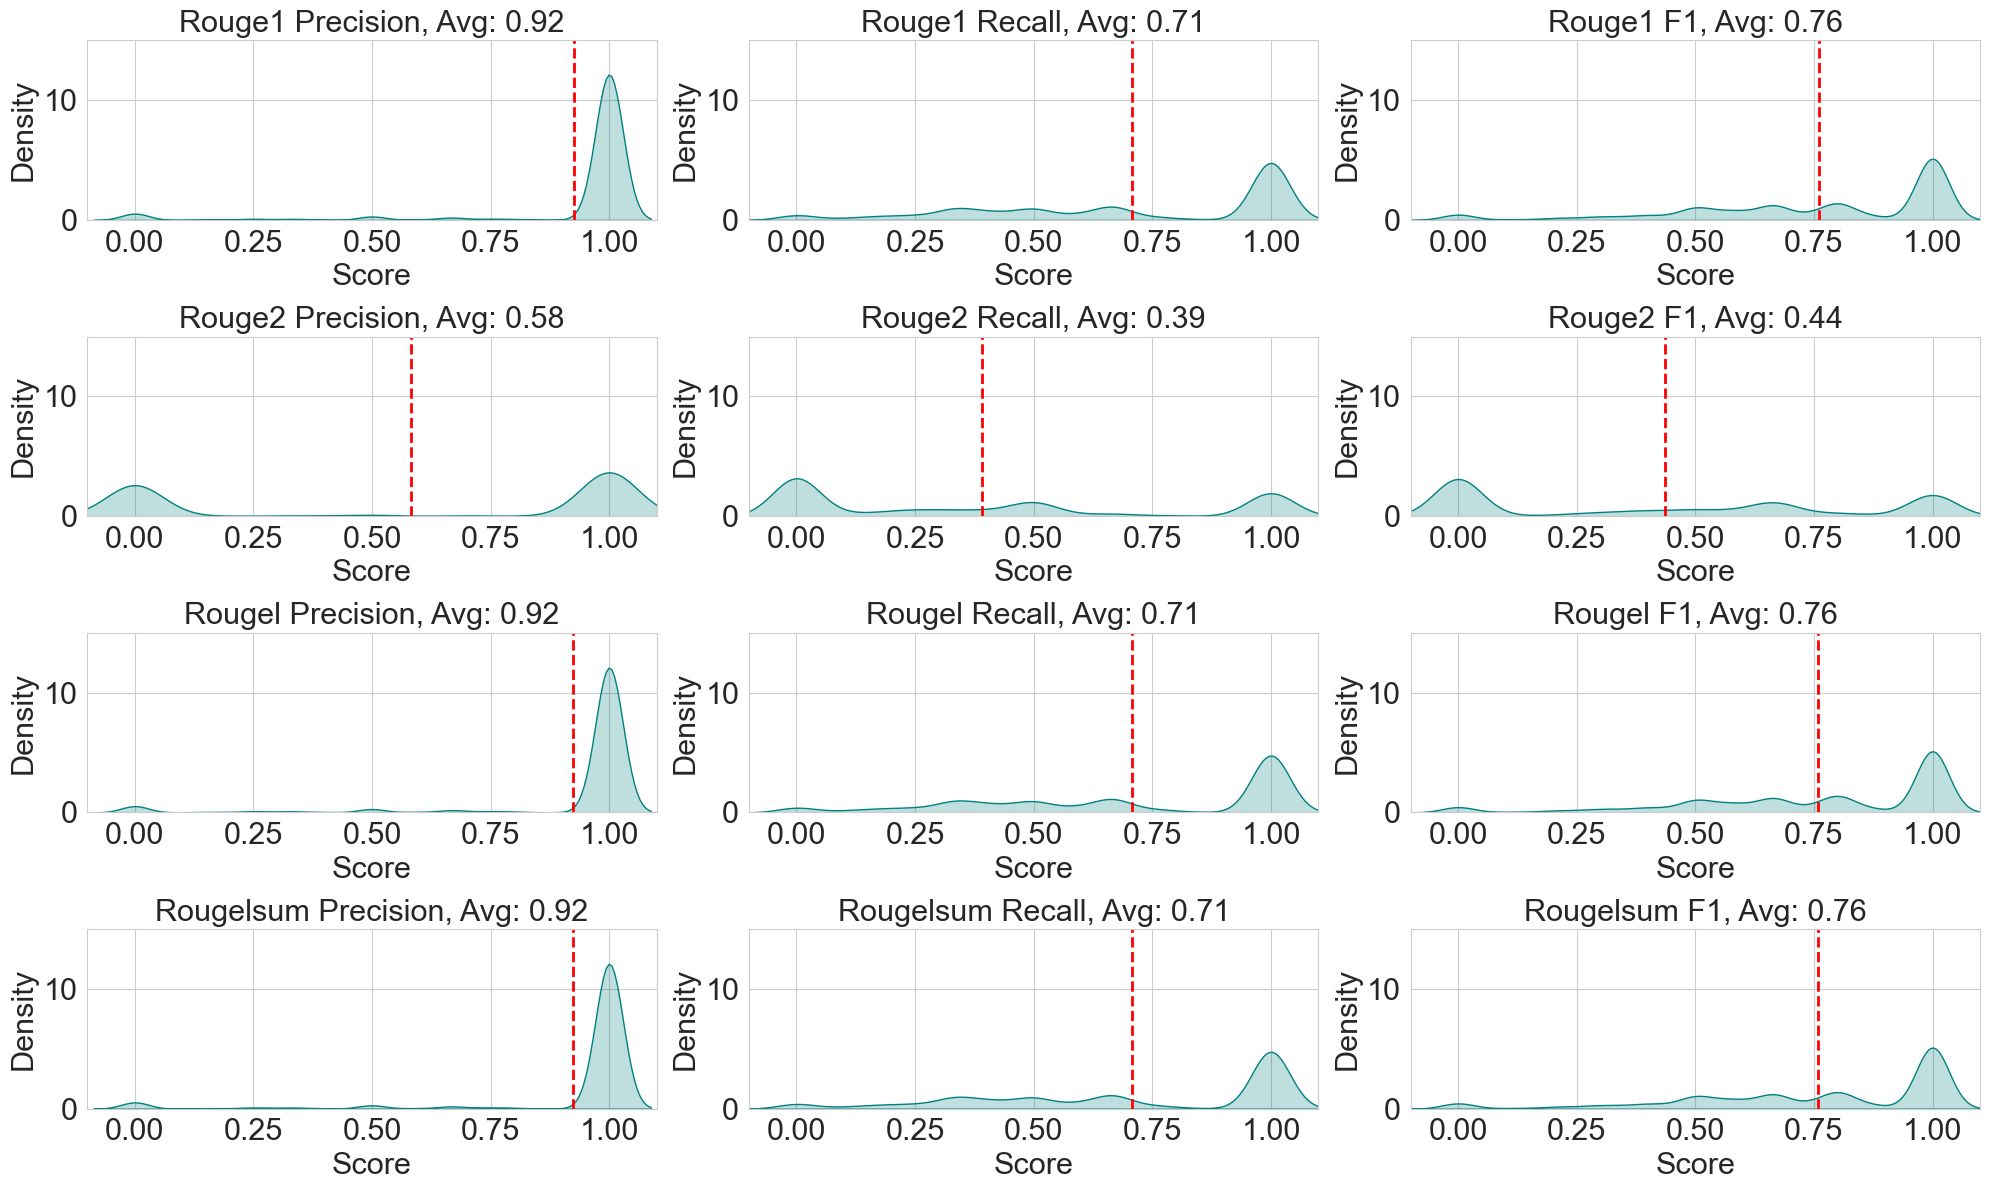

In [16]:
# ROUGE score on SQuAD dataset with Azure pipeline after the fine-tuning process
_generate_rouge_visual(tune_df, font_size, 'teal', 15)

In [17]:
azure_tune_df = pd.read_csv('../../data/training/result/squad/Azure-AI/logs/training-log.csv')

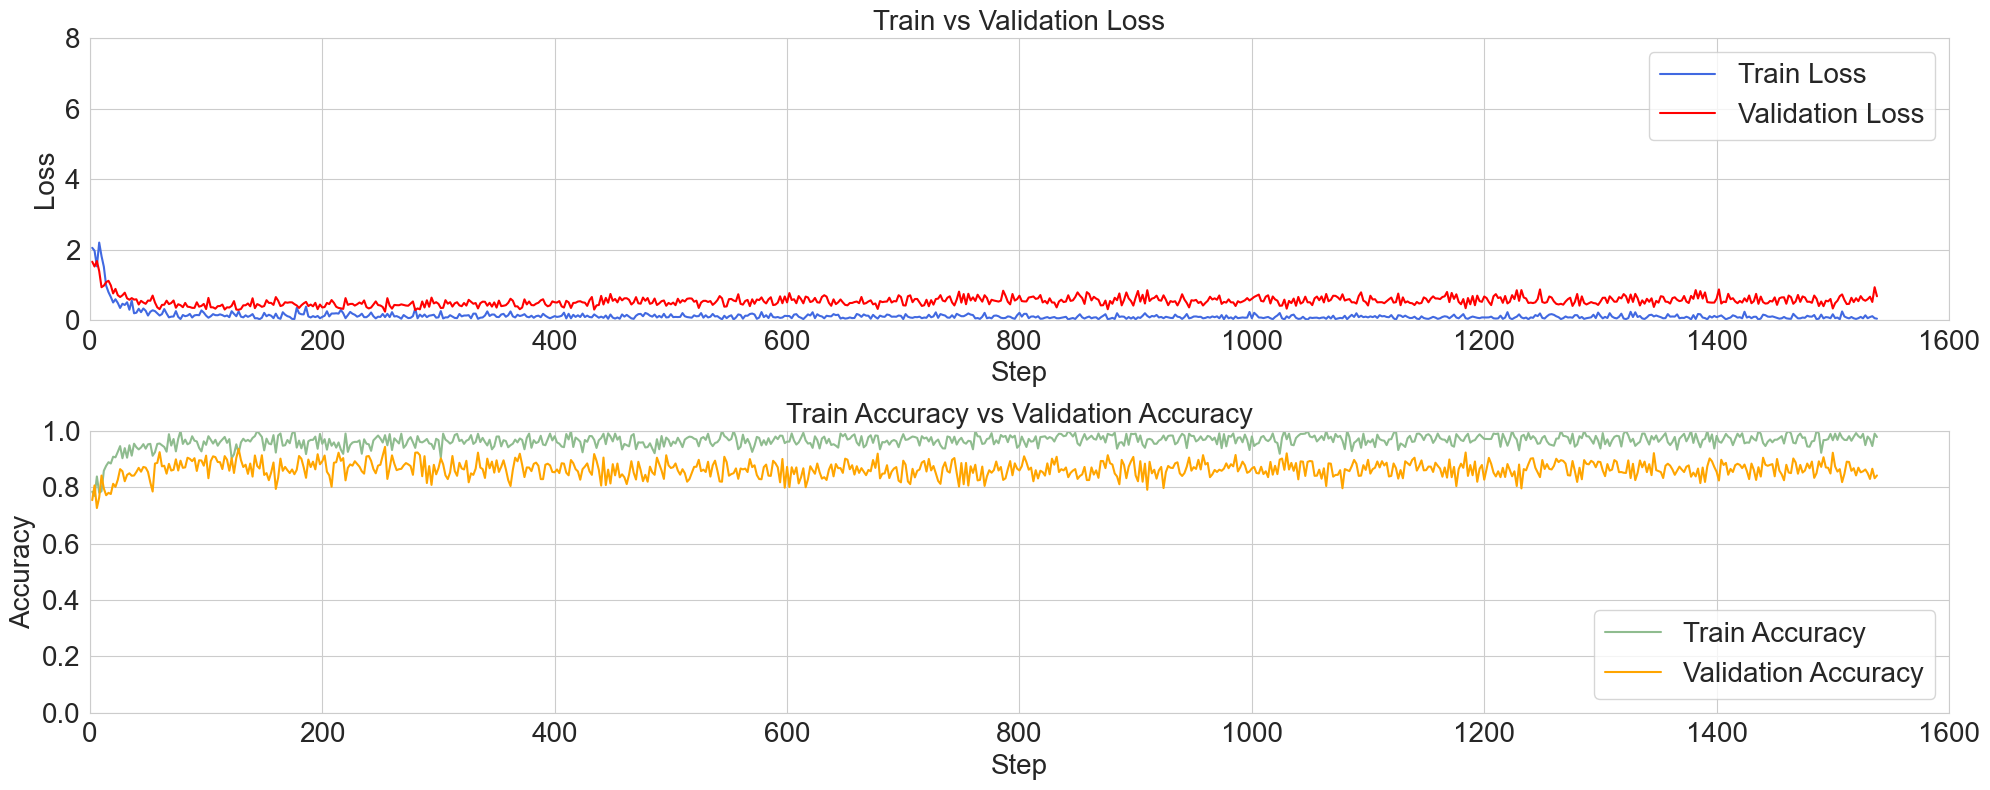

In [18]:
_learning_curve_visual(azure_tune_df, 2, 1600, 8, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 20)

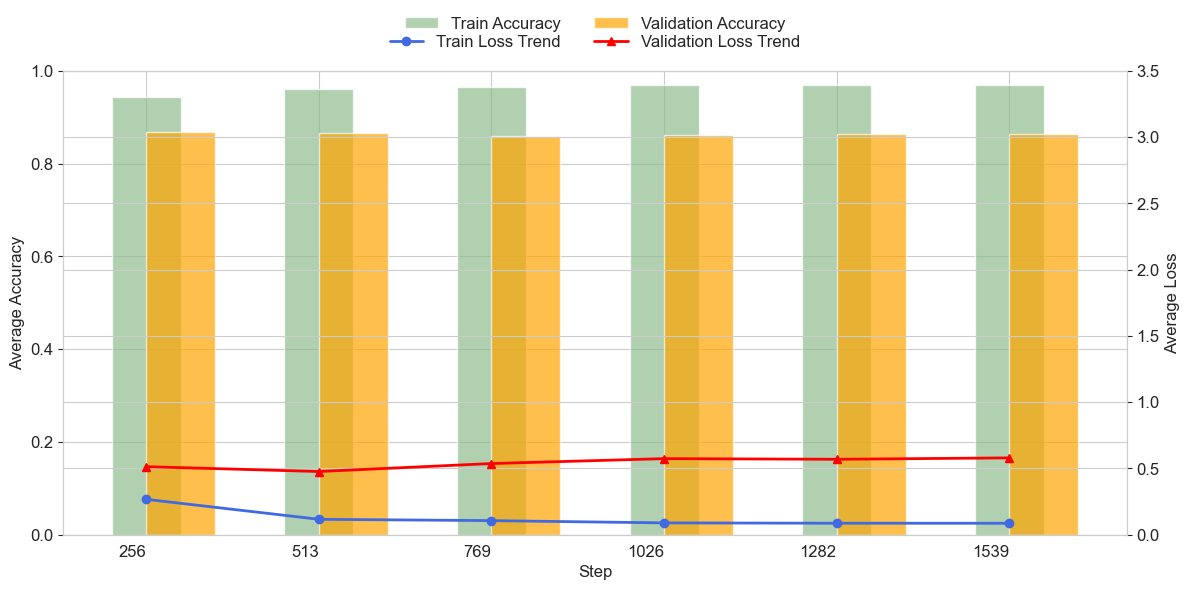

In [19]:
_binned_train_score(azure_tune_df, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 12, 3.5)

### Custom Pipeline's Score Visualization on SQuAD Dataset¶

In [20]:
base_df = pd.read_csv('../../data/training/result/squad/Custom/metrics/gpt-3.5-turbo.csv')
tune_df = pd.read_csv('../../data/training/result/squad/Custom/metrics/9tGlpqli.csv')

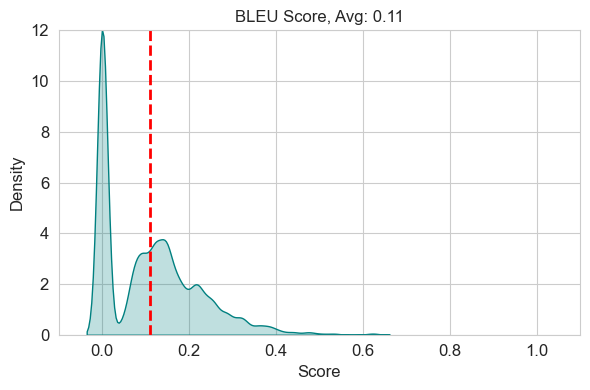

In [21]:
# BLEU score on SQuAD dataset with Custom pipeline prior the fine-tuning process
_generate_bleu_visual(base_df, 12, 'teal', 12)

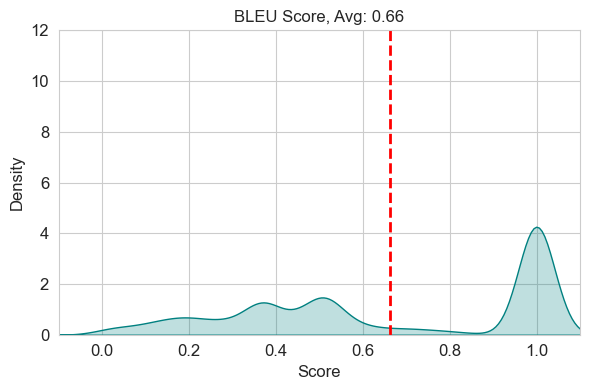

In [22]:
# BLEU score on SQuAD dataset with Custom pipeline after the fine-tuning process
_generate_bleu_visual(tune_df, 12, 'teal', 12)

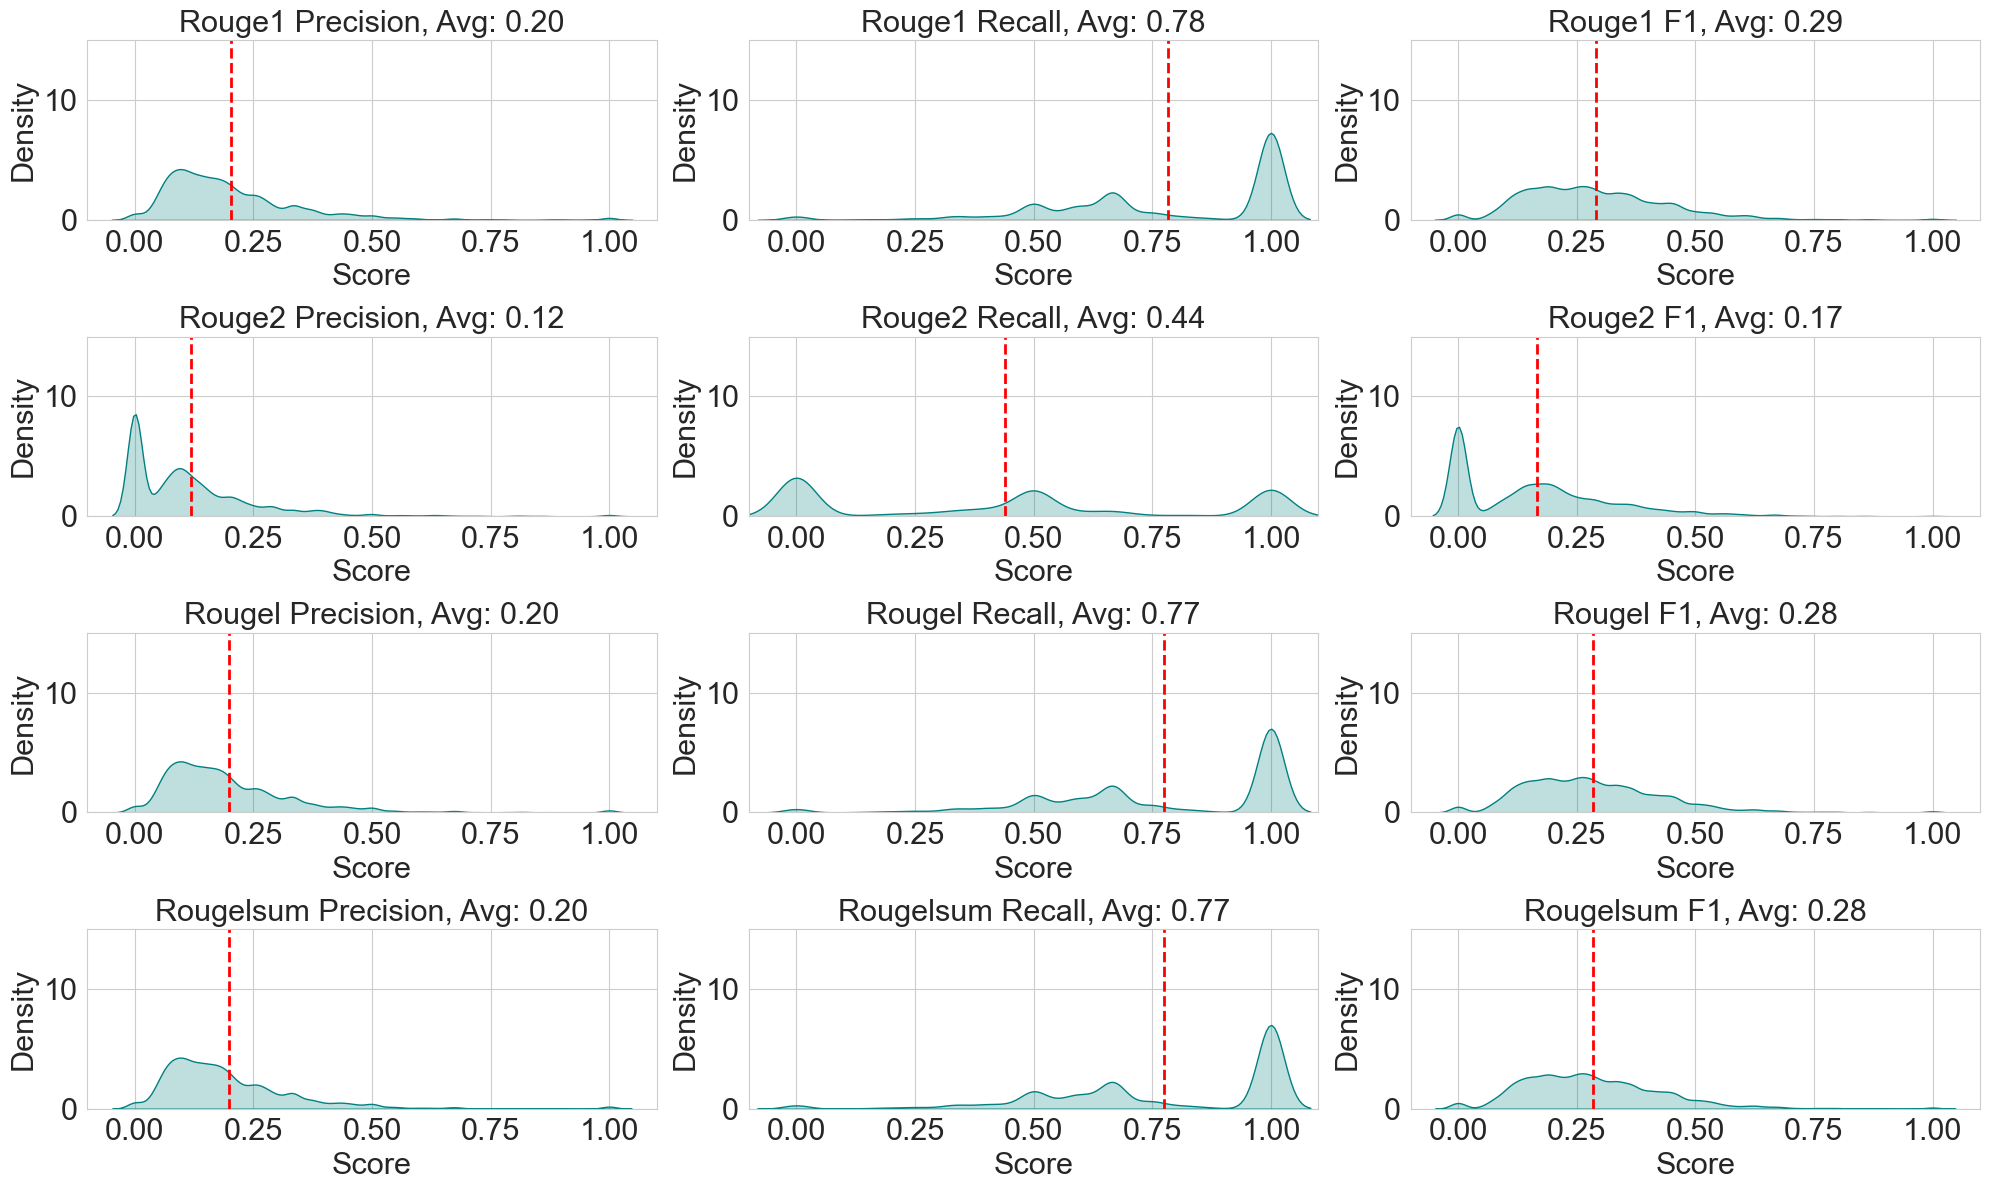

In [23]:
# ROUGE score on SQuAD dataset with Custom pipeline prior the fine-tuning process
_generate_rouge_visual(base_df, font_size, 'teal', 15)

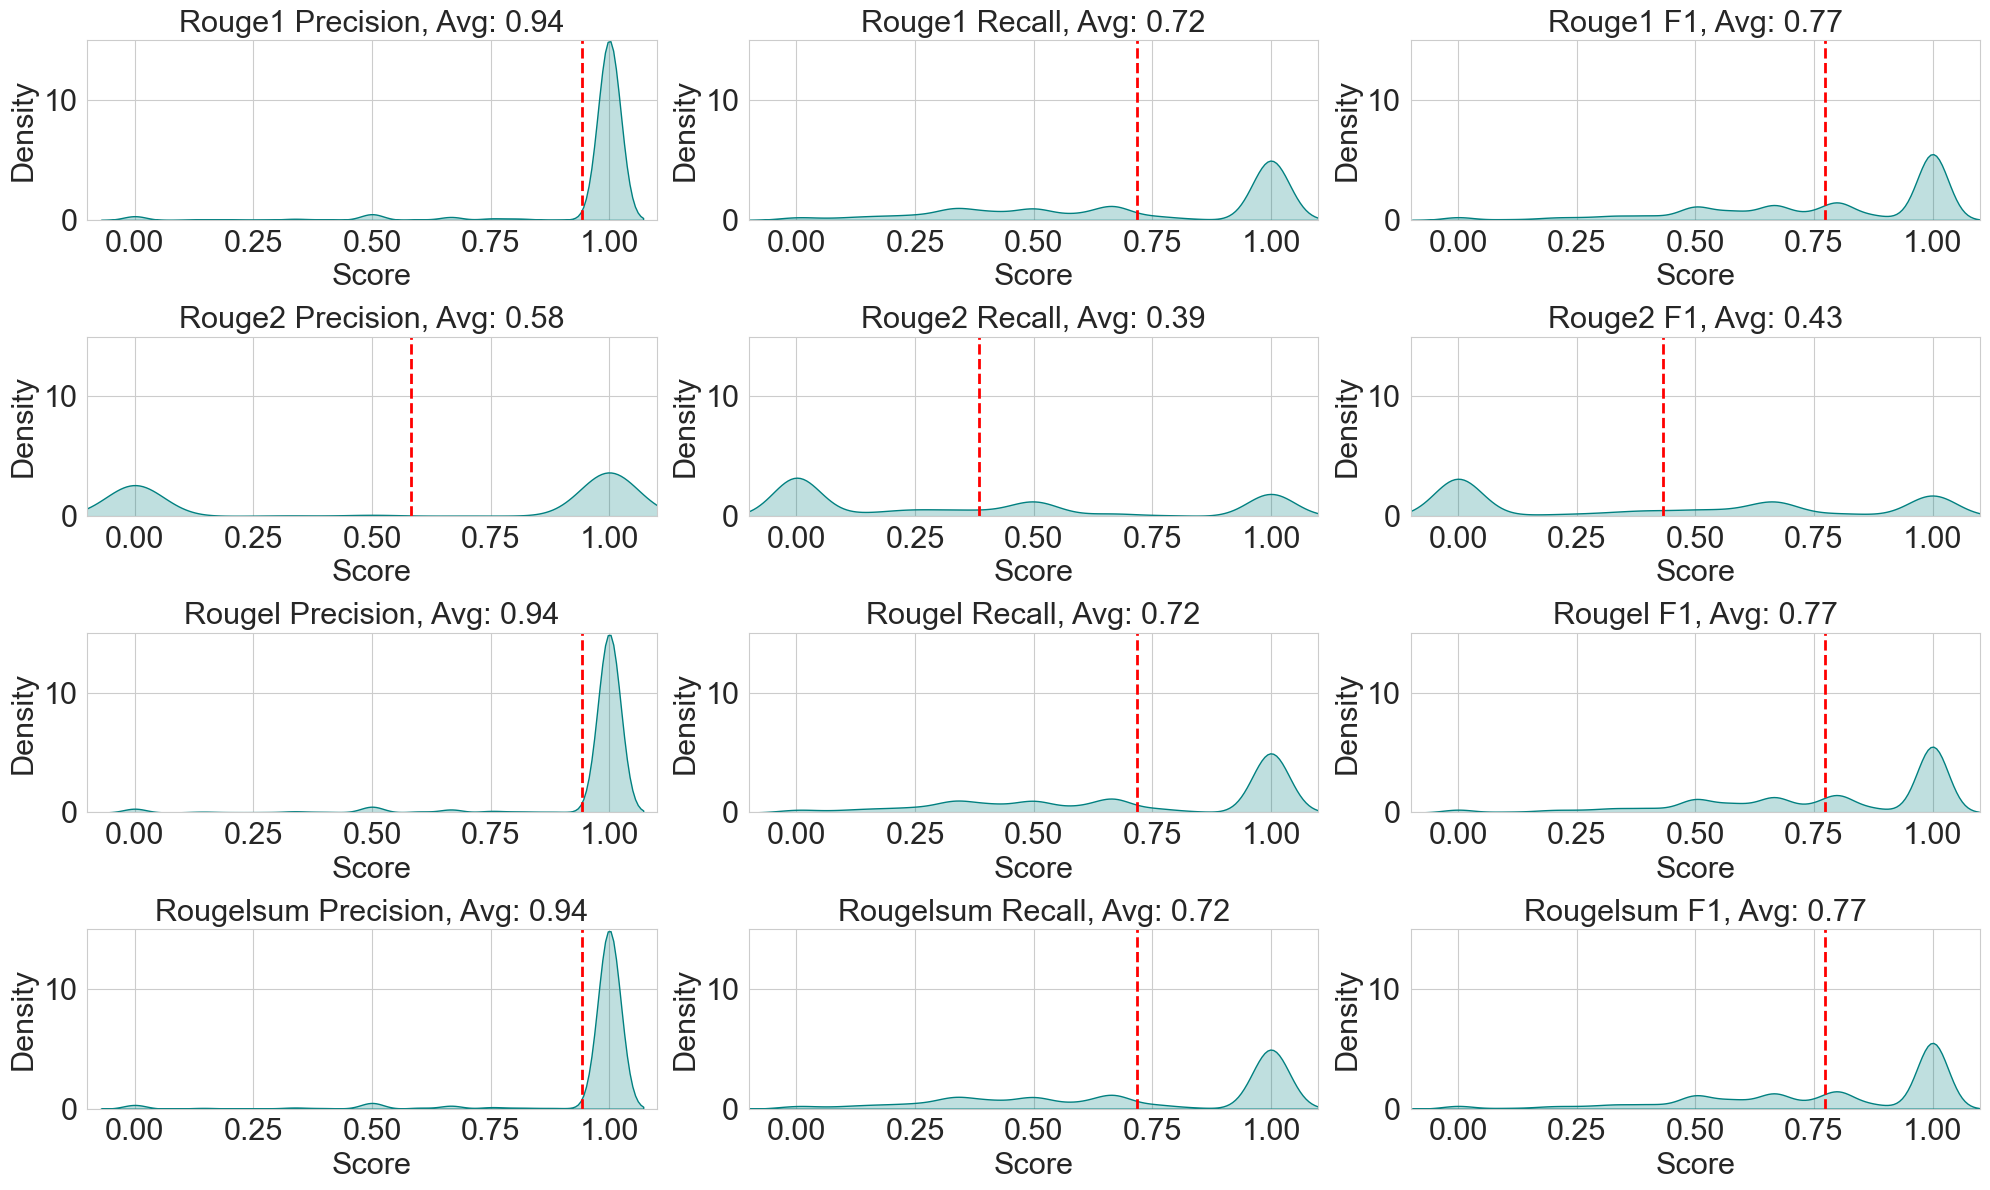

In [24]:
# ROUGE score on SQuAD dataset with Custom pipeline after the fine-tuning process
_generate_rouge_visual(tune_df, font_size, 'teal', 15)

In [25]:
training_log_df = pd.read_csv('../../data/training/result/squad/Custom/logs/file-q0yqKxZk7laxoaeZqm3gAOdO.csv')

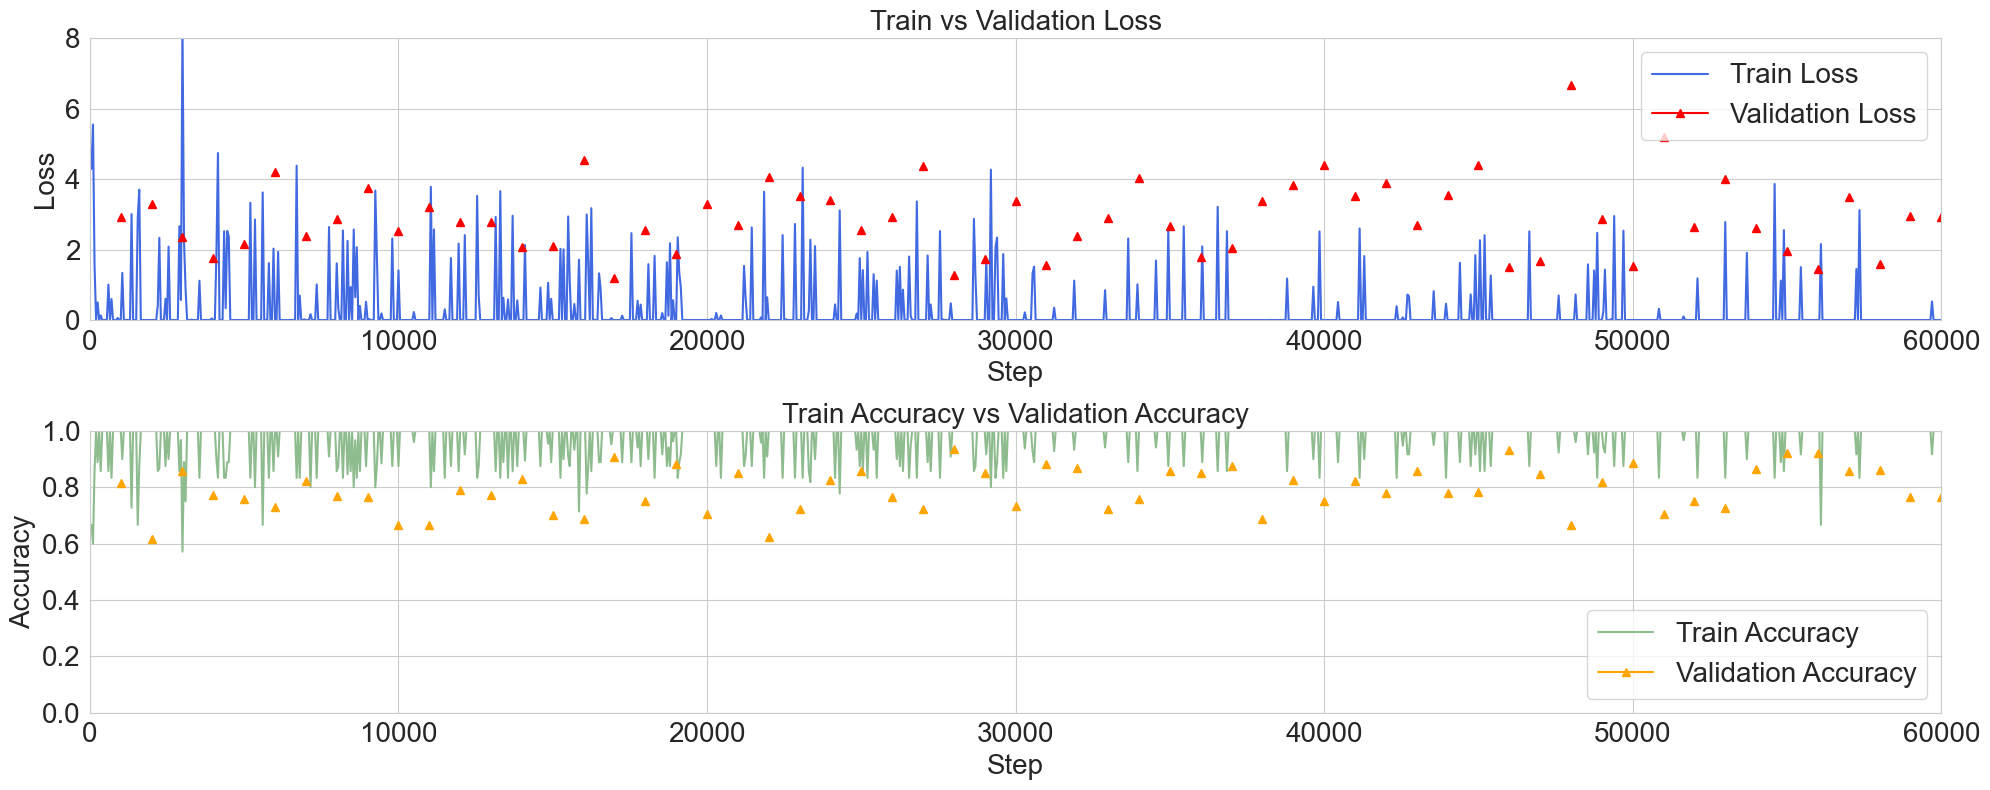

In [26]:
_learning_curve_visual(training_log_df, 50, 60000, 8, ['train_loss', 'valid_loss', 'train_accuracy', 'valid_mean_token_accuracy'], 20, marker='^')

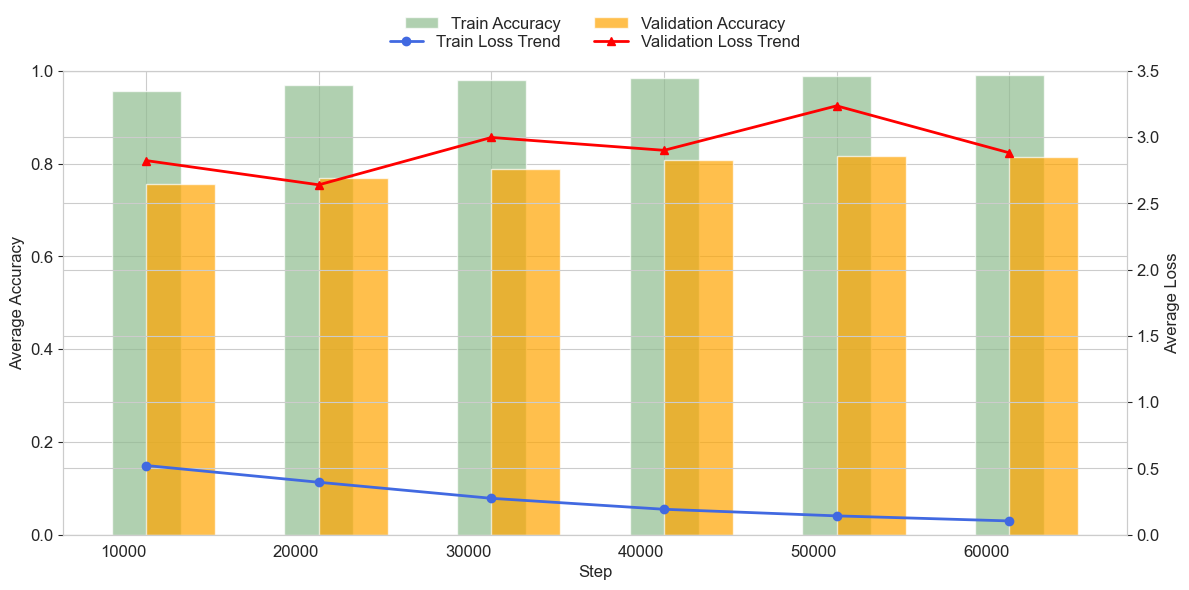

In [27]:
_binned_train_score(training_log_df, ['train_loss', 'valid_loss', 'train_accuracy', 'valid_mean_token_accuracy'], 12, 3.5)

### Score Visualization on Comprehensive Project Dataset Prior Data Refinement Process with 1,000 Records

In [28]:
# before-refinement with 1,000 records
training_log_df = pd.read_csv('../../data/training/result/project_info/logs/file-0d3eb831d20d400b99510551a12983e9.csv')

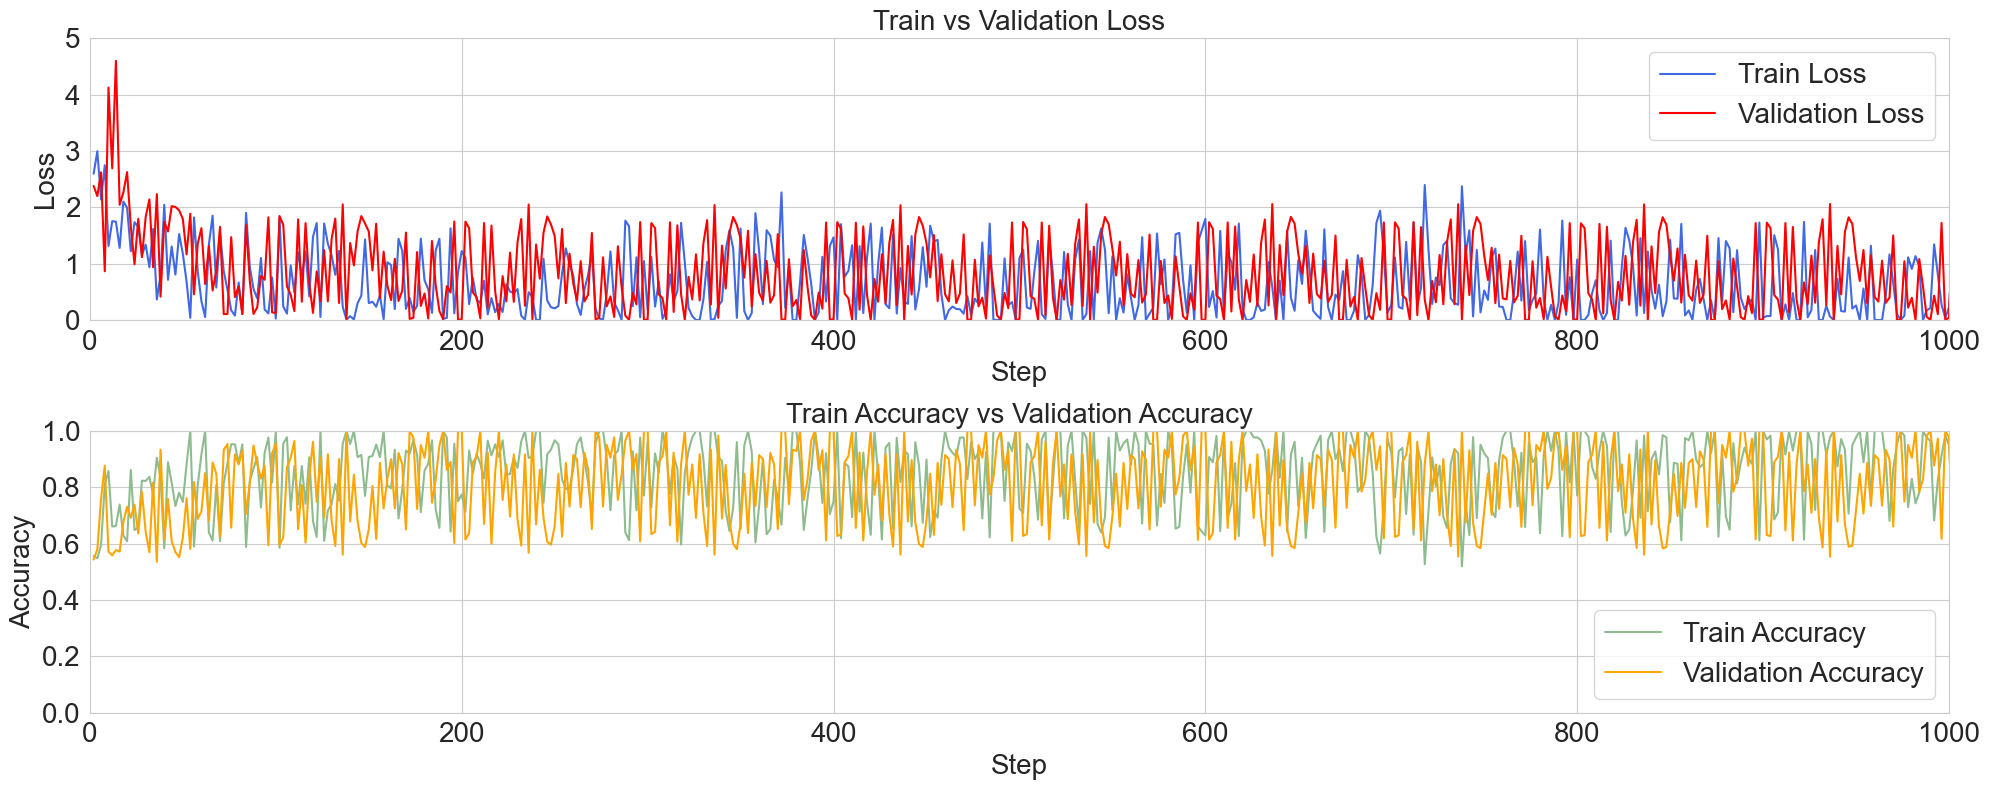

In [29]:
_learning_curve_visual(training_log_df, 2, 1000, 5, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 20)

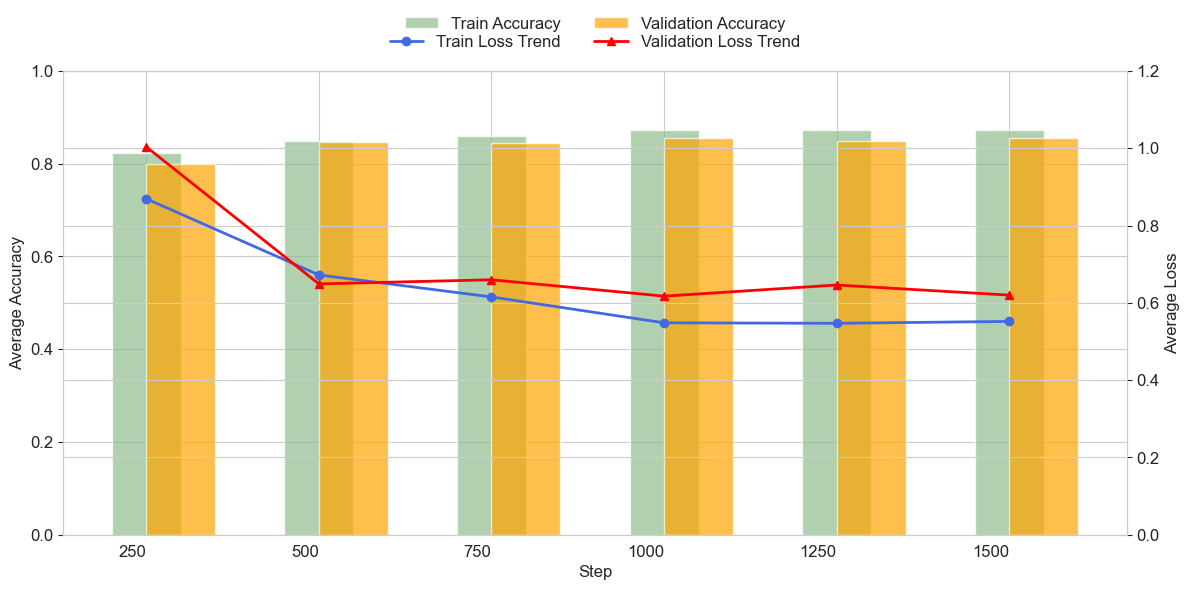

In [30]:
_binned_train_score(training_log_df, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 12, 1.2)

### Score Visualization on Comprehensive Project Dataset Prior Data Refinement Process with 7,000 Records

In [31]:
# before-refinement with 7,000 records
training_log_df = pd.read_csv('../../data/training/result/project_info/logs/file-cc42656a6be5448b8710b7d5f1f2718d.csv')

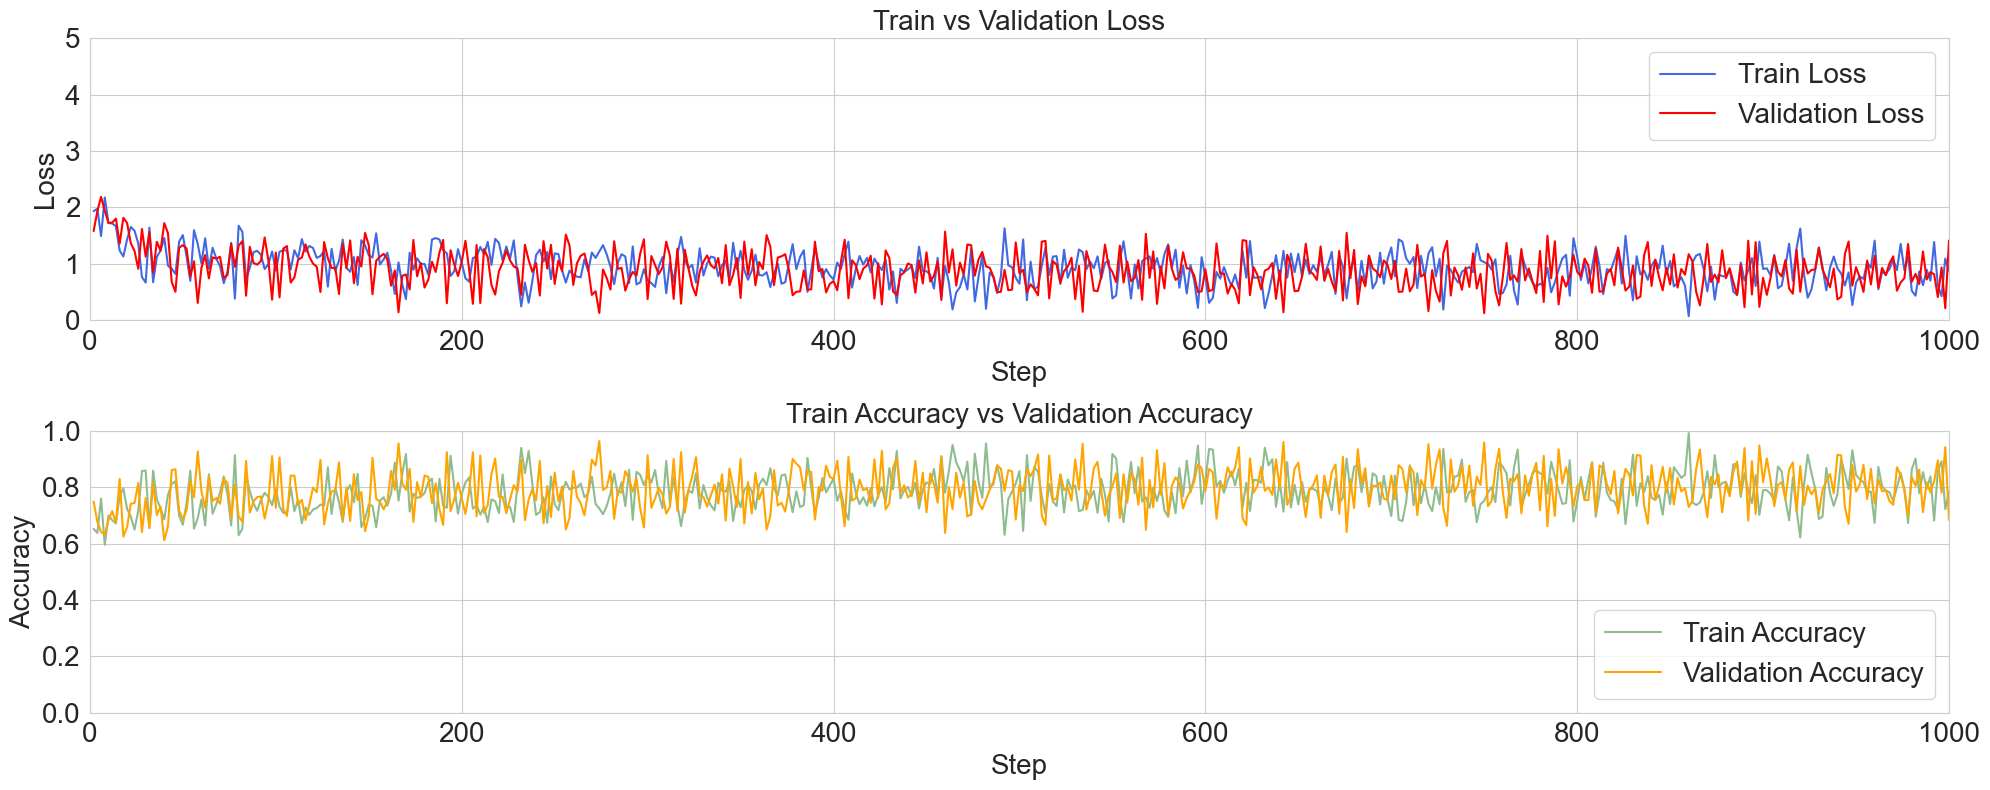

In [32]:
_learning_curve_visual(training_log_df, 2, 1000, 5, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 20)

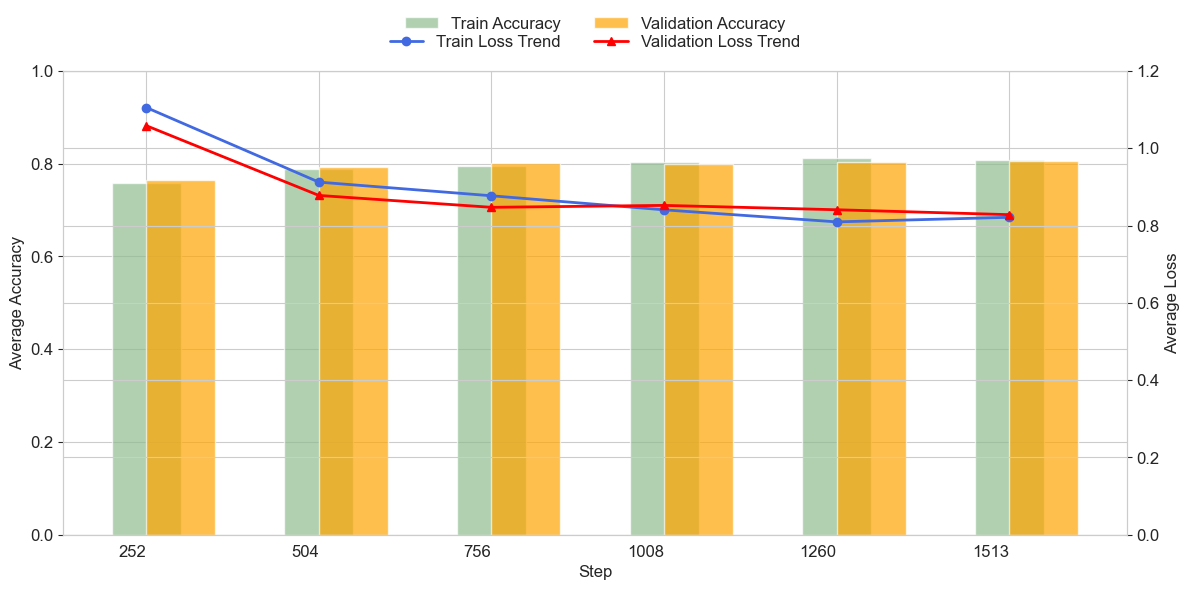

In [33]:
_binned_train_score(training_log_df, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 12, 1.2)

### Score Visualization on Comprehensive Project Dataset after Data Refinement Process

In [34]:
training_log_df = pd.read_csv('../../data/training/result/project_info/logs/file-tsgeyXYsQesflDerK3kbBQ0Y.csv')

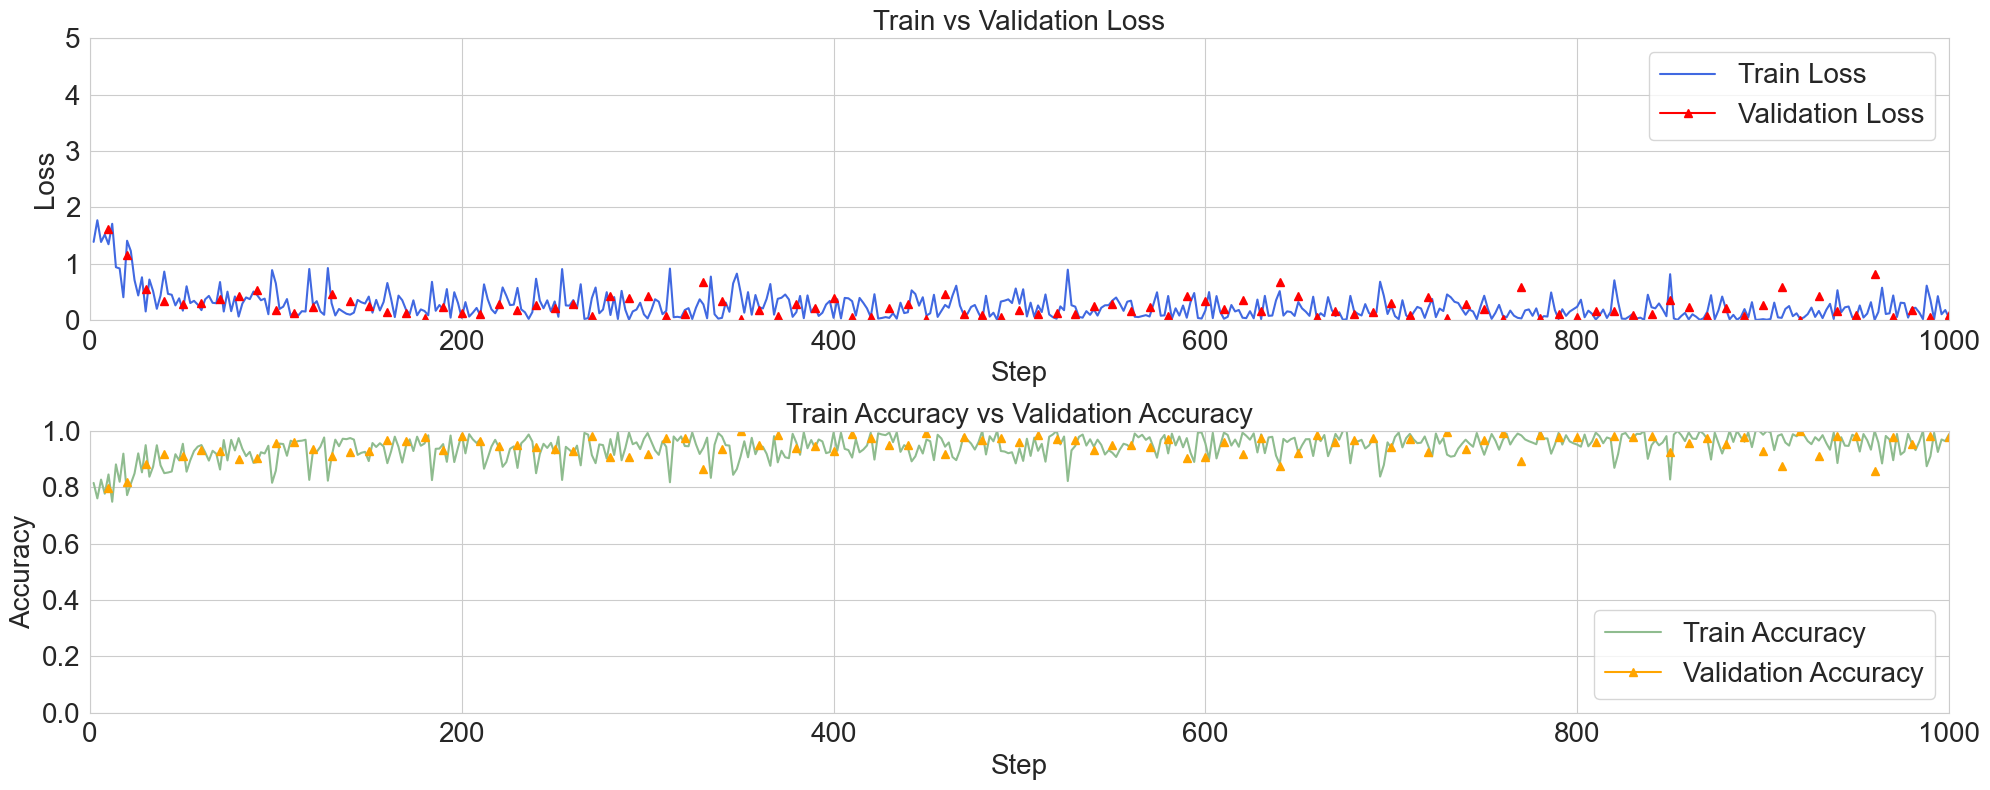

In [35]:
_learning_curve_visual(training_log_df, 2, 1000, 5, ['train_loss', 'valid_loss', 'train_accuracy', 'valid_mean_token_accuracy'], 20, marker='^')

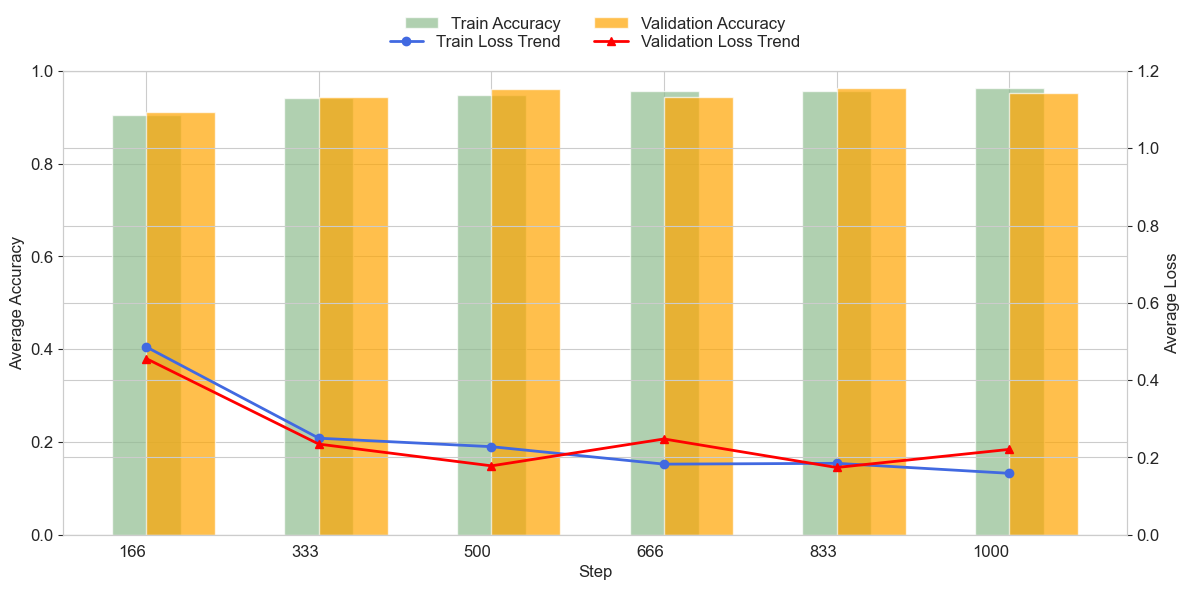

In [36]:
_binned_train_score(training_log_df, ['train_loss', 'valid_loss', 'train_accuracy', 'valid_mean_token_accuracy'], 12, 1.2)

### Score Visualization on GHG Emission Reduction Dataset Prior Data Refinement Process

In [37]:
# before-refinement 
training_log_df = pd.read_csv('../../data/training/result/ghg_emission_reduction/logs/file-a4cddfe5341546b2848ad90b2e241db7.csv')

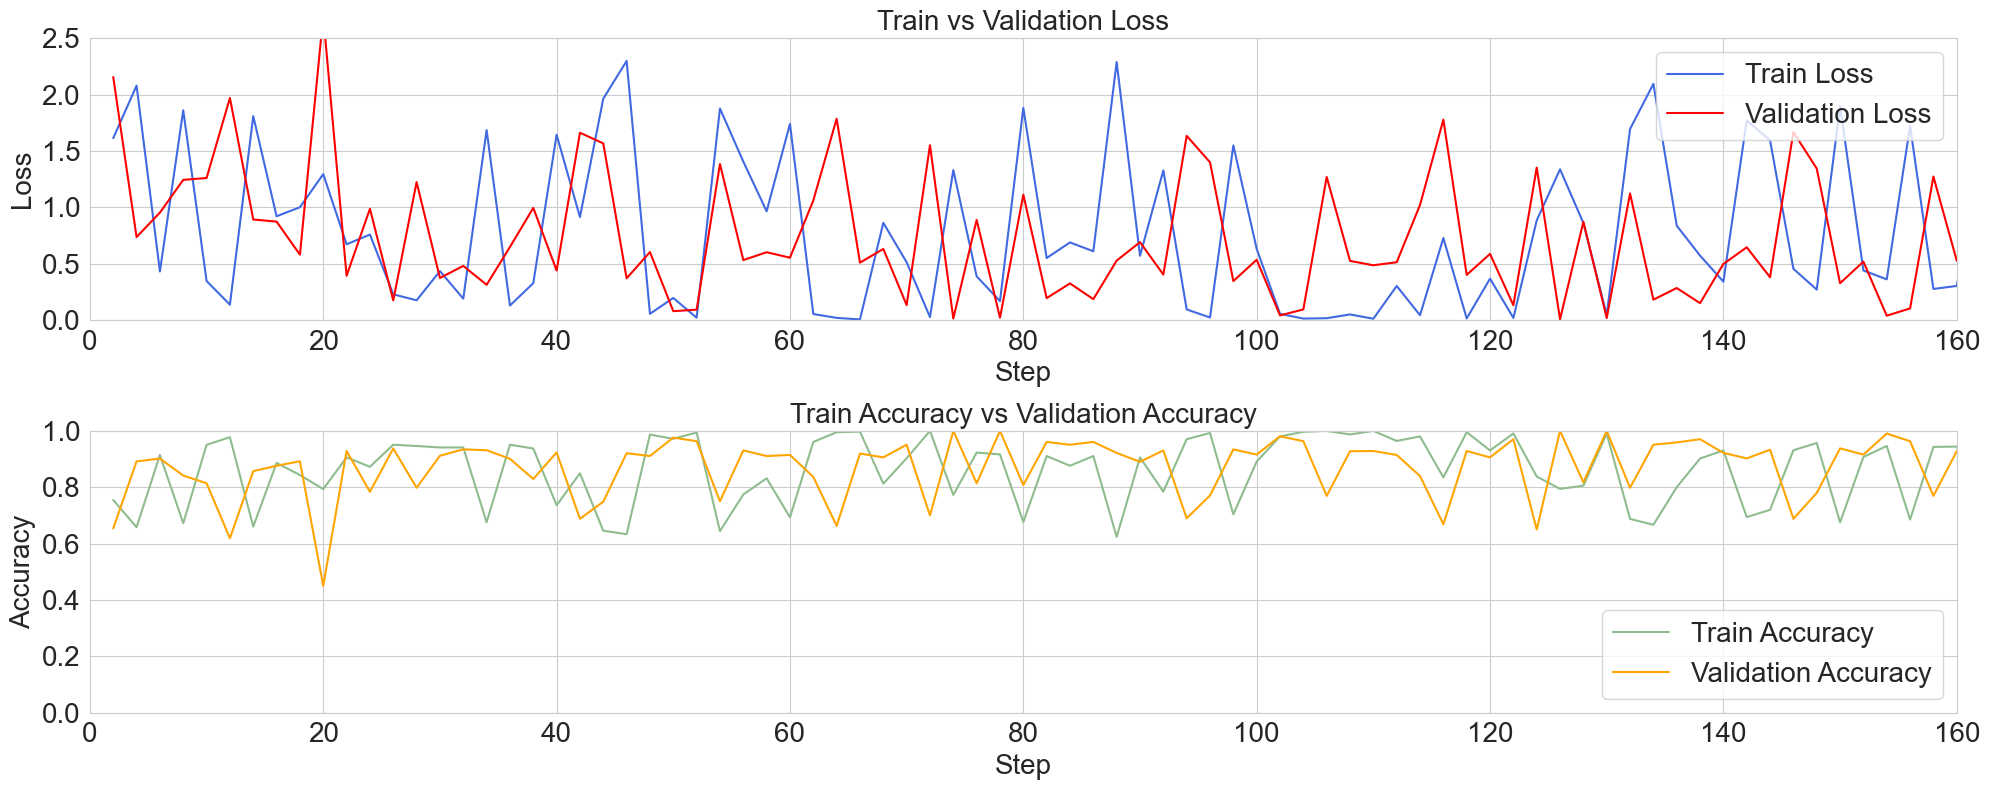

In [38]:
_learning_curve_visual(training_log_df, 2, 160, 2.5, ['train_loss', 'valid_loss', 'train_mean_token_accuracy', 'valid_mean_token_accuracy'], 20)

### Score Visualization on GHG Emission Reduction Dataset after Data Refinement Process

In [39]:
training_log_df = pd.read_csv('../../data/training/result/ghg_emission_reduction/logs/file-cH5urO4gVvaDKJFOlWgOHNBy.csv')

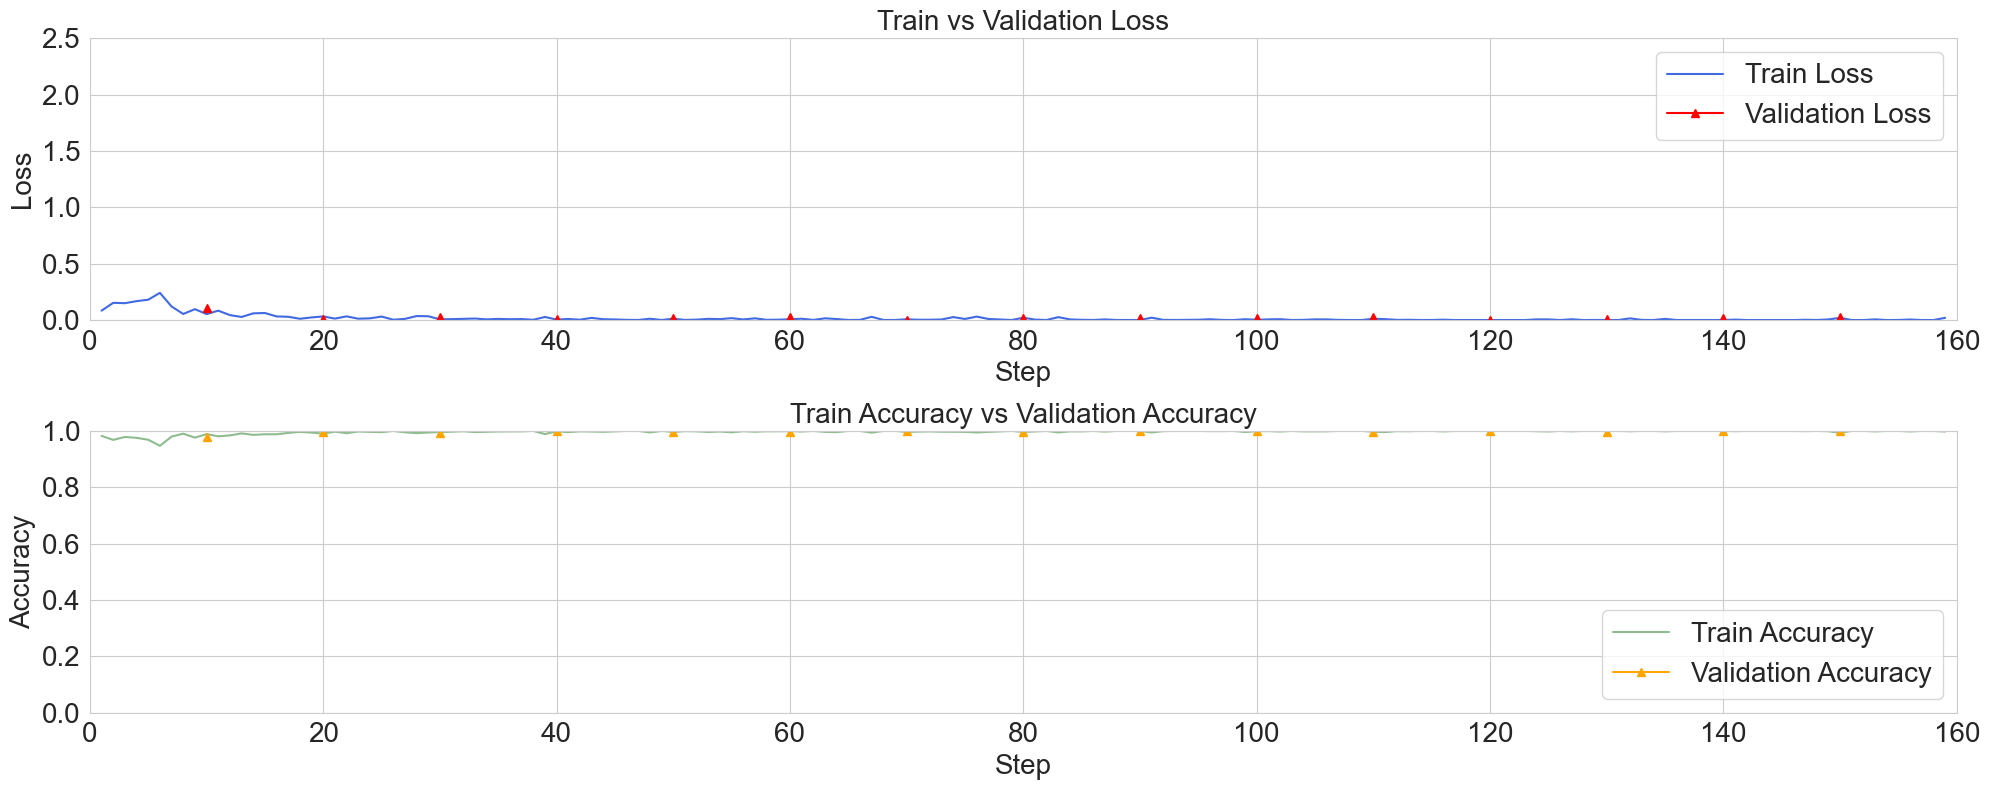

In [40]:
_learning_curve_visual(training_log_df, 1, 160, 2.5, ['train_loss', 'valid_loss', 'train_accuracy', 'valid_mean_token_accuracy'], 20, marker='^')